# Tutorial de imágenes astronómicas: Introducción

# Juan David Galan Vargas - 202111470

## 1) Paquetes necesarios

In [66]:
!ls

"ls" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [67]:
!pip install --upgrade numpy scipy matplotlib pandas "astropy[recommended]" photutils scikit-image

## 2) Imágenes .fits

### 2.1) Lectura de archivos y directorios en python

In [68]:
from glob import glob

In [69]:
glob("*")

['cruda.png',
 'data',
 'desviaciones.png',
 'introducción.ipynb',
 'Practica 1 Cumulos Juan Galan 202111470.ipynb']

In [70]:
files = glob("data/*.fits")
files

['data\\A.fits', 'data\\B.fits']

In [71]:
from astropy.io import fits

In [72]:
fits?

Type:        module
String form: <module 'astropy.io.fits' from 'c:\\Users\\juang\\anaconda3\\lib\\site-packages\\astropy\\io\\fits\\__init__.py'>
File:        c:\users\juang\anaconda3\lib\site-packages\astropy\io\fits\__init__.py
Docstring:  
A package for reading and writing FITS files and manipulating their
contents.

A module for reading and writing Flexible Image Transport System
(FITS) files.  This file format was endorsed by the International
Astronomical Union in 1999 and mandated by NASA as the standard format
for storing high energy astrophysics data.  For details of the FITS
standard, see the NASA/Science Office of Standards and Technology
publication, NOST 100-2.0.


In [73]:
fits.info?

Signature: fits.info(filename, output=None, **kwargs)
Docstring:
Print the summary information on a FITS file.

This includes the name, type, length of header, data shape and type
for each HDU.

Parameters
----------
filename : path-like or file-like
    FITS file to obtain info from.  If opened, mode must be one of
    the following: rb, rb+, or ab+ (i.e. the file must be readable).

output : file, bool, optional
    A file-like object to write the output to.  If ``False``, does not
    output to a file and instead returns a list of tuples representing the
    HDU info.  Writes to ``sys.stdout`` by default.
**kwargs
    Any additional keyword arguments to be passed to
    `astropy.io.fits.open`.
    *Note:* This function sets ``ignore_missing_end=True`` by default.
File:      c:\users\juang\anaconda3\lib\site-packages\astropy\io\fits\convenience.py
Type:      function


In [74]:
for file in files:
    print(fits.info(file))

Filename: data\A.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   (318, 509)   float32   
None
Filename: data\B.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   (318, 509)   float32   
None


In [75]:
fits.info("data/A.fits")

Filename: data/A.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   (318, 509)   float32   


### 2.2) Headers

In [76]:
fits.getheader("data/A.fits")
#flats: Calibración, Objects: Ciencia, 

SIMPLE  =                    T  /  FITS STANDARD                                
BITPIX  =                  -32  /  FITS BITS/PIXEL                              
NAXIS   =                    2  /  NUMBER OF AXES                               
NAXIS1  =                  318  /                                               
NAXIS2  =                  509  /                                               
OBJECT  = 'M-92 V  '            /                                               
ORIGIN  = 'KPNO-IRAF'           /                                               
DATE    = '17-09-93'            /                                               
IRAFNAME= 'im010.imh'           /  NAME OF IRAF IMAGE FILE                      
IRAF-MAX=           1.064900E4  /  DATA MAX                                     
IRAF-MIN=           4.810000E2  /  DATA MIN                                     
IRAF-BPX=                   32  /  DATA BITS/PIXEL                              
IRAFTYPE= 'REAL    '        

podemos obtener todos los headers de nuestras imágenes:

In [77]:
headers = [fits.getheader(f) for f in files]
headers[1]

SIMPLE  =                    T  /  FITS STANDARD                                
BITPIX  =                  -32  /  FITS BITS/PIXEL                              
NAXIS   =                    2  /  NUMBER OF AXES                               
NAXIS1  =                  318  /                                               
NAXIS2  =                  509  /                                               
OBJECT  = 'M-92 V  '            /                                               
ORIGIN  = 'KPNO-IRAF'           /                                               
DATE    = '17-09-93'            /                                               
IRAFNAME= 'im011.imh'           /  NAME OF IRAF IMAGE FILE                      
IRAF-MAX=           8.332000E3  /  DATA MAX                                     
IRAF-MIN=           4.770000E2  /  DATA MIN                                     
IRAF-BPX=                   32  /  DATA BITS/PIXEL                              
IRAFTYPE= 'REAL    '        

Los atributos del header se acceden como si se trataran de diccionarios de python:

In [78]:
headers[0]["OBJECT"]

'M-92 V'

In [79]:
headers[0]["EXPTIME"]

60

In [80]:
headers[0]["DATE-OBS"]

'01/09/87'

### 2.3) datos

Los datos de la imagen se obtienen con `fits.getdata`, y serán guardados en arrays de numpy bidimensionales.

Por esto importamos numpy, antes que nada.

In [81]:
import numpy as np
np.set_printoptions(linewidth=120) # para que se vea

y ahora sí importamos las imágenes como tal:

In [82]:
images = [fits.getdata(f) for f in files]

In [83]:
images[0]

array([[37.184605, 47.360104, 49.133606, ..., 40.524715, 39.21413 , 37.51868 ],
       [41.218204, 47.555954, 48.699158, ..., 43.074856, 54.495537, 50.512478],
       [40.18866 , 42.581043, 53.572693, ..., 44.766705, 37.798122, 59.58666 ],
       ...,
       [47.135468, 40.28973 , 52.449577, ..., 35.836357, 42.49507 , 54.60417 ],
       [44.669   , 39.22278 , 46.34222 , ..., 34.451347, 45.486805, 44.37549 ],
       [38.97707 , 46.36016 , 40.002304, ..., 53.20716 , 54.100876, 58.340065]], dtype='>f4')

In [84]:
images[1]

array([[25.754072, 50.96217 , 54.71842 , ..., 46.026836, 36.794113, 31.20716 ],
       [35.792076, 32.002987, 37.150127, ..., 42.660328, 52.150948, 33.30919 ],
       [32.763535, 45.132782, 36.013943, ..., 50.306107, 37.386684, 44.56182 ],
       ...,
       [46.72898 , 49.454998, 52.047398, ..., 45.086212, 41.10095 , 49.33669 ],
       [32.648247, 45.658104, 37.08536 , ..., 40.90823 , 47.0163  , 42.052467],
       [51.849495, 45.96036 , 51.95038 , ..., 43.156124, 40.207977, 45.325253]], dtype='>f4')

Con esto podemos hacer operaciones sobre los datos, como se haría con cualquier otro array de numpy.

In [85]:
images[0].max()

10160.793

In [86]:
images[0].min()

-7.8015227

In [87]:
images[0].mean()

46.84091

In [88]:
np.median(images[0])

42.498184

In [89]:
np.std(images[0])

93.601685

### 2.4) Visualización con matplotlib

In [90]:
import matplotlib.pyplot as plt

Usaremos la función imshow:

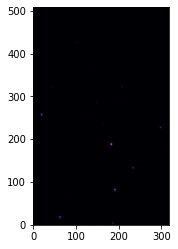

In [91]:
plt.imshow(images[0])
#Izquierda X, Abajo Y

No se ve demasiado, y los colores son artificiales. Podemos cambiar el tamaño de la figura y el mapa de color utilizado para representar los datos.
También recomiendo cambiar el origen de los ejes a "lower".

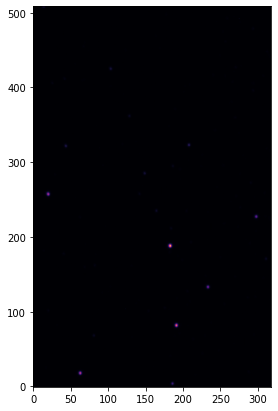

In [92]:
plt.figure(figsize=(7,7))
plt.imshow(images[0],cmap="magma",origin="lower")

Estos cambios se pueden hacer permanentes de esta forma:

In [93]:
#plt.rcParams["figure.figsize"] = (10,10) # no recomendado
plt.rcParams["image.cmap"] = "magma" # pueden ver más colormaps aquí: https://matplotlib.org/stable/users/explain/colors/colormaps.html
plt.rcParams["image.origin"] = "lower"

Para visualizar mejor la imagen se limitan los colores con los argumentos `vmin` y `vmax`.

También podemos darnos una idea de qué valores de cuentas estamos viendo con una barra de color.

Juegue con los valores de vmin y vmax hasta poder ver las estrellas del fondo, y quizás un poco del ruido del cielo:

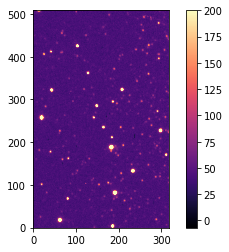

In [94]:
p = plt.imshow(images[0],vmin=-7,vmax=200)
plt.colorbar(p)

Uno puede tantearlos imagen a imagen, pero claramente hay maneras más elegantes de hacerlo. 
Podemos definir una función que llame a `plt.imshow`, pero que automáticamente nos ponga el `vmin` y `vmax` a los cuantiles 1% y 99% de los datos de la imagen:

In [95]:
def quantile_imshow(img,lower=0.01,upper=0.99,**kwargs):
    img_vmin = np.quantile(img,lower)
    img_vmax = np.quantile(img,upper)
    return plt.imshow(img,vmin=img_vmin,vmax=img_vmax,**kwargs)

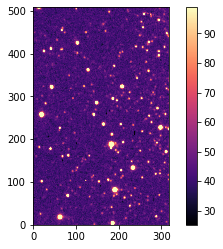

In [96]:
p = quantile_imshow(images[0], cmap="magma")
plt.colorbar(p)

a un array 1D:

In [97]:
flattened = images[0].ravel()
flattened.shape

(161862,)

Ahora podemos hacer el histograma. Modifique el argumento `bins` para que en lugar de que el histograma se vea desde el mínimo a máximo de los datos, use el vmin y el vmax que encontró arriba para la imagen.

Text(0, 0.5, 'Frecuencia')

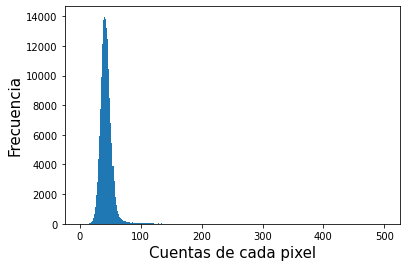

In [98]:
plt.hist(flattened,bins=np.linspace(0,500,300))
plt.xlabel("Cuentas de cada pixel",fontsize=15)
plt.ylabel("Frecuencia",fontsize=15)

Podemos usar una escala log-log para poder apreciar todos los datos, sean cielo o estrellas:

Text(0, 0.5, 'Frecuencia')

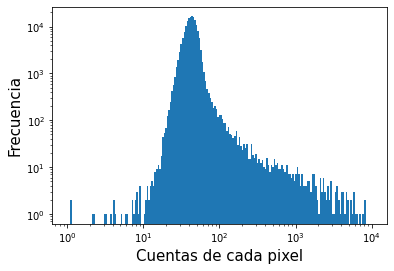

In [99]:
plt.hist(images[0].ravel(),bins=np.logspace(0,4,200),log=True); # qué está haciendo logspace aquí?
plt.xscale("log")
plt.xlabel("Cuentas de cada pixel",fontsize=15)
plt.ylabel("Frecuencia",fontsize=15)

### Ejercicio 1

> Defina otra función, llamada `my_imshow`, que ponga automáticamente los `vmin` y `vmax`, pero esta vez a un número dado de desviaciones estándar del promedio de la imagen.
> Es decir, dado $n$,
> $$v_{min}= \mu - n  \sigma$$
> $$v_{max}= \mu + n  \sigma$$
> El `n` por defecto podría ser 5.

Nota: ya que tenemos puntos "atípicos" (las estrellas) la media y la desviación estándar se ven gravemente afectadas, y pueden no ser la mejor idea.
Algunas alternativas son:

* Lo clásico en astronomía: usar "sigma clipping", para lo cual existe el módulo `astropy.stats.sigma_clipping`, y su función `sigma_clipped_stats`.
* La media (`np.median`) como estimador de localización, y la MAD como estimador de escala (`scipy.stats.median_abs_deviation`).
* Estimadores robustos un poco más elegantes, disponibles en `astropy.stats.biweight.biweight_location` y `astropy.stats.biweight.biweight_scale`.

Yo la verdad me quedo con mis cuantiles la mayoría de las veces.

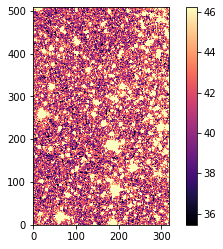

In [100]:
from astropy.stats import biweight_location, biweight_scale
from astropy.stats import sigma_clipped_stats
from scipy.stats import median_abs_deviation 

# respuesta

def a_imshow(img,flattened, n,**kwargs):
    mu= np.median(flattened)
    o= median_abs_deviation(flattened)
    lower= (mu-n*o)/100
    upper= (mu+n*o)/100
    img_vmin = np.quantile(img,lower)
    img_vmax = np.quantile(img,upper)
    return plt.imshow(img,vmin=img_vmin,vmax=img_vmax,**kwargs)
p = a_imshow(images[0],flattened, 5,cmap="magma")
plt.colorbar(p)
def b_imshow(img,flattened, n,**kwargs):
    mu= np.median(flattened)
    o= sigma_clipped_stats(flattened)
    lower= (mu-n*o)/100
    upper= (mu+n*o)/100
    img_vmin = np.quantile(img,lower)
    img_vmax = np.quantile(img,upper)
    return plt.imshow(img,vmin=img_vmin,vmax=img_vmax,**kwargs)
#b= b_imshow(images[0],flattened, 6,cmap="magma")
#plt.colorbar(b)

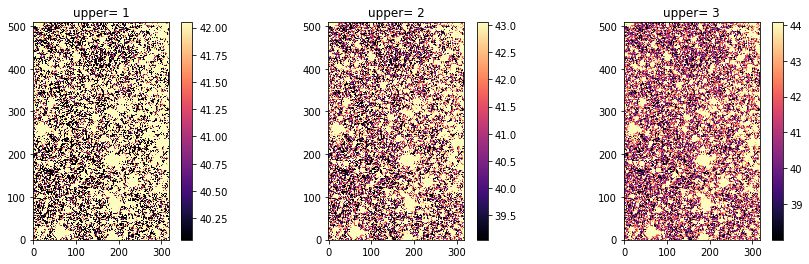

In [101]:
fig,ax = plt.subplots(ncols=3,figsize=(15,4))
for i in range(3):
    plt.sca(ax[i])
    a_imshow(images[0],flattened, i+1 ,cmap="magma")
    plt.title("upper= "+str(i+1))
    plt.colorbar()


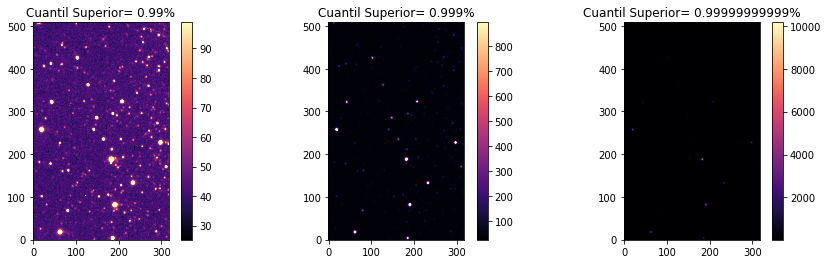

In [125]:
fig,ax = plt.subplots(ncols=3,figsize=(15,4))
lim=[1, 2, 10]
for i in range(3):
    plt.sca(ax[i])
    quantile_imshow(images[0],lower=0.01, upper=1-(0.1**(lim[i]+1)) ,cmap="magma")
    plt.title("Cuantil Superior= "+str(1-(0.1**(lim[i]+1)))+"%")
    plt.colorbar()



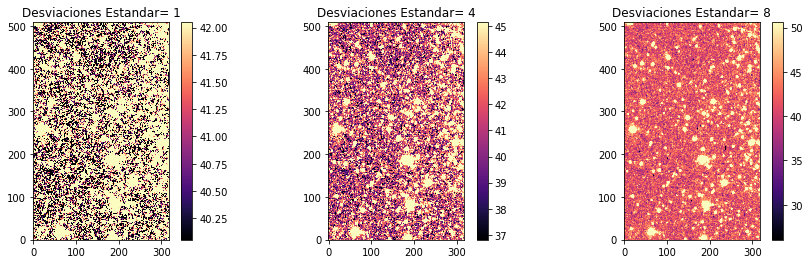

In [103]:
fig,ax = plt.subplots(ncols=3,figsize=(15,4))
lim=[1, 4, 8]
for i in range(3):
    plt.sca(ax[i])
    a_imshow(images[0],flattened, lim[i] ,cmap="magma")
    plt.title("Desviaciones Estandar= "+str(lim[i]))
    plt.colorbar()

### 2.5) subplots y zoom

Podemos ver las imágenes al tiempo usando subplots:

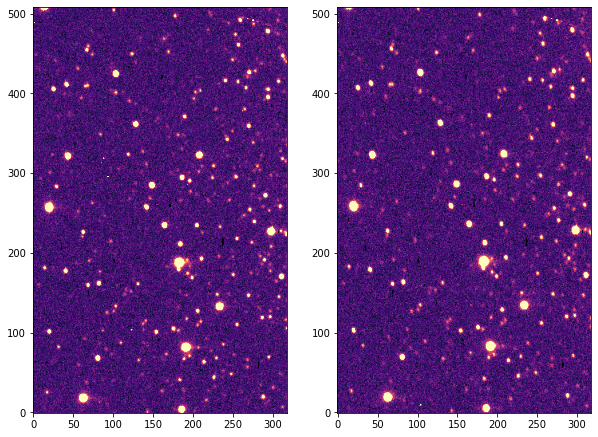

In [104]:
fig,ax = plt.subplots(ncols=2,figsize=(10,10))

plt.sca(ax[0]) # sca: Set Current Axis
quantile_imshow(images[0])

plt.sca(ax[1]) # sca: Set Current Axis
quantile_imshow(images[1])

A primera vista son completamente iguales. Podemos ver un poco más de cerca usando slicing. 

Seleccionemos esa primera estrella brillante en la esquina inferior. Como primer paso, seleccionemos los pixeles de 0 a 100 en x y en y:

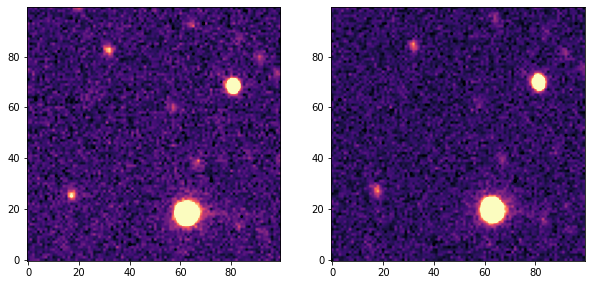

In [105]:
fig,ax = plt.subplots(ncols=2,figsize=(10,10))
for i,image in enumerate(images):
    plt.sca(ax[i])
    quantile_imshow(image[:100,:100])

La estrella parece estar en el pixel 60,20, más o menos. Pero algo para tener en cuenta es que en numpy el orden de los ejes es `[y,x]`.
Entonces, si queremos ver a detalle esa estrella, queremos el slice `[y=10:30, x=50:70]`

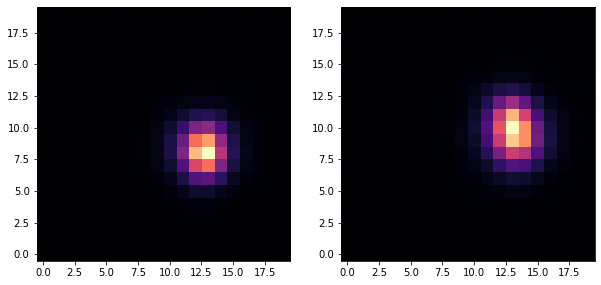

In [106]:
fig,ax = plt.subplots(ncols=2,figsize=(10,10))
for i,image in enumerate(images):
    plt.sca(ax[i])
    plt.imshow(image[10:30,50:70])

Podemos observar que la estrella está ligeramente corrida. Dado que las imágenes fueron tomadas a tres minutos la una de la otra:

In [107]:
headers

[SIMPLE  =                    T  /  FITS STANDARD                                
 BITPIX  =                  -32  /  FITS BITS/PIXEL                              
 NAXIS   =                    2  /  NUMBER OF AXES                               
 NAXIS1  =                  318  /                                               
 NAXIS2  =                  509  /                                               
 OBJECT  = 'M-92 V  '            /                                               
 ORIGIN  = 'KPNO-IRAF'           /                                               
 DATE    = '17-09-93'            /                                               
 IRAFNAME= 'im010.imh'           /  NAME OF IRAF IMAGE FILE                      
 IRAF-MAX=           1.064900E4  /  DATA MAX                                     
 IRAF-MIN=           4.810000E2  /  DATA MIN                                     
 IRAF-BPX=                   32  /  DATA BITS/PIXEL                              
 IRAFTYPE= 'REAL

In [108]:
for h in headers:
    print(h["DATE-OBS"]+h["UT"])

01/09/87 3:30:24.00
01/09/87 3:33:18.00


O también sumando la imagen en x y en y, y comparando los picos que representa la estrella:

In [109]:
sum_y = [image[10:30,50:70].sum(axis=0) for image in images]
sum_x = [image[10:30,50:70].sum(axis=1) for image in images]

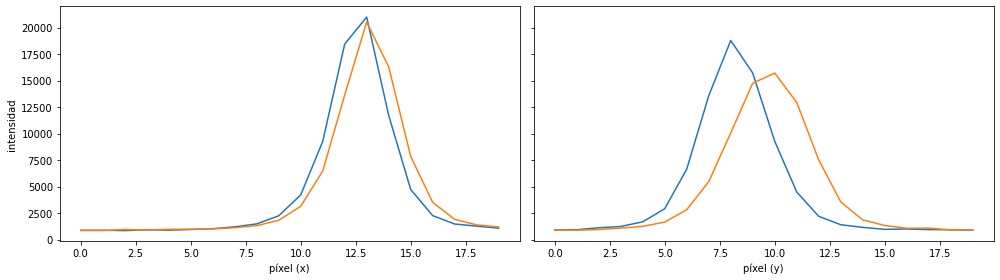

In [110]:
fig,ax = plt.subplots(ncols=2,figsize=(14,4),sharey=True)

plt.sca(ax[0])
plt.plot(sum_y[0])
plt.plot(sum_y[1])
plt.xlabel("píxel (x)")
plt.ylabel("intensidad")

plt.sca(ax[1])
plt.plot(sum_x[0])
plt.plot(sum_x[1])
plt.xlabel("píxel (y)")

plt.tight_layout()

In [111]:
from scipy.optimize import curve_fit
from scipy.stats import norm

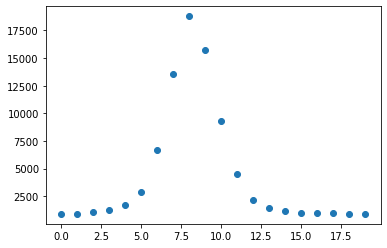

In [112]:
i= np.arange(0,20)
plt.scatter(i, sum_x[0])

8.629067157808395


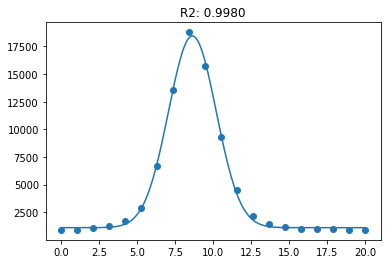

In [113]:
#Ejemplo de Curve fit de Gaussiana
def exponential_func(x, A, B, C, S):
    return A * np.exp(-((x-C)/S)**2) +B
ind= np.linspace(0,20, 20)
indices= np.linspace(0,20, 200)
params, covariance = curve_fit(exponential_func, ind, sum_x[0], p0=[18000, sum_x[0].min(), 8, 1])
fit_values= exponential_func(indices, *params)
residuals = sum_x[0] - exponential_func(ind, *params)
ss_residual = np.sum(residuals**2)
ss_total = np.sum((sum_x[0] - np.mean(sum_x[0]))**2)
r2 = 1 - (ss_residual / ss_total)
plt.plot(indices, fit_values)
plt.scatter(ind, sum_x[0])
plt.title('R2: {:.4f}'.format(r2))
centro=params[2]
print(centro)



# Ejercicio 2 Estrella Asignada
Esta se encuentra en 50 y 100 en el X (Vertical) y alrededor de 200 en el eje Y (Horizontal)
Referencia: Tiene dos estrellas tenues justo debajo y una a la derecha

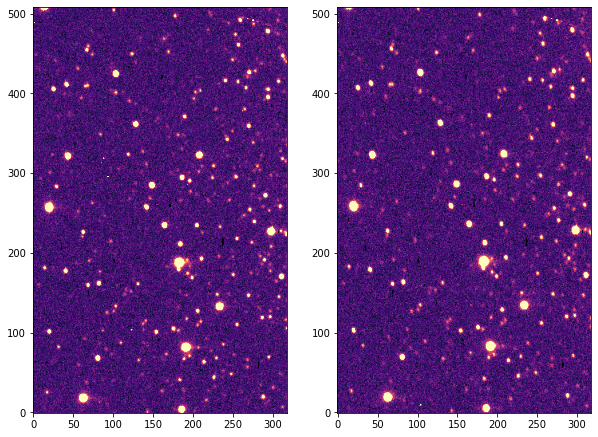

In [114]:
fig,ax = plt.subplots(ncols=2,figsize=(10,10))

plt.sca(ax[0]) # sca: Set Current Axis
quantile_imshow(images[0])

plt.sca(ax[1]) # sca: Set Current Axis
quantile_imshow(images[1])

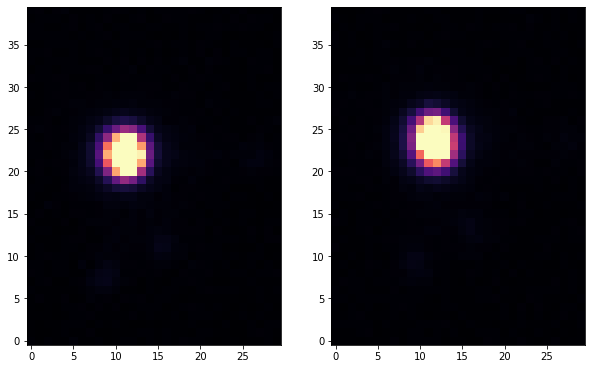

In [115]:

fig,ax = plt.subplots(ncols=2,figsize=(10,10))
for i,image in enumerate(images):
    plt.sca(ax[i])
    quantile_imshow(image[60:100,180:210], cmap="magma")

Si se aumenta el brillo en la pantalla es posible observar a simplemente las 2 estrellas en la parte inferior

In [116]:
sum_y1 = [image[60:100,180:210].sum(axis=0) for image in images]
sum_x1 = [image[60:100,180:210].sum(axis=1) for image in images]

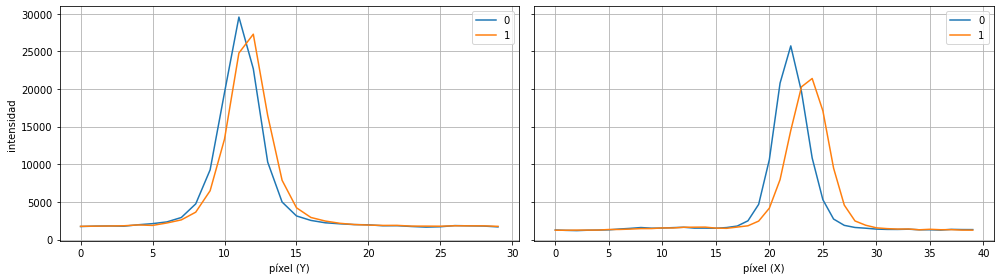

In [117]:
fig,ax = plt.subplots(ncols=2,figsize=(14,4),sharey=True)

plt.sca(ax[0])
plt.plot(sum_y1[0], label="0")
plt.plot(sum_y1[1], label="1")
plt.xlabel("píxel (Y)")
plt.ylabel("intensidad")
plt.grid(True)
plt.legend()
plt.sca(ax[1])
plt.plot(sum_x1[0], label="0")
plt.plot(sum_x1[1], label="1")
plt.xlabel("píxel (X)")
plt.grid(True)
plt.legend()
plt.tight_layout()

In [124]:
def centro(sum_x, p0):
    ind= np.linspace(0,len(sum_x), len(sum_x))
    indices= np.linspace(0,len(sum_x), 200)
    params, covariance = curve_fit(exponential_func, ind, sum_x, p0)
    centro=params[2]
    return centro
px0=[25000, sum_x1[0].min(), 22, 1]
x0=centro(sum_x1[0], px0)
px1=[21000, sum_x1[1].min(), 24, 1]
x1=centro(sum_x1[1], px1)
py0=[30000, sum_y1[0].min(), 12, 1]
y0=centro(sum_y1[0], py0)
py1=[27000, sum_y1[1].min(), 12, 1]
y1=centro(sum_y1[1], py0)
def vector_desplazamiento(x0, x1, y0, y1):
    return [x1-x0, y1-y0]

vec=vector_desplazamiento(x0,x1,y0,y1)
print(vec)

[1.7110929778855066, 0.5656902682430669]


El anterior resultado, es el vector de desplazamiento que describe la transformación de la imagen 0 a 1

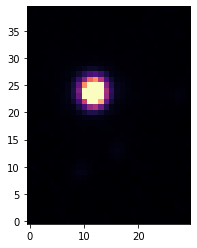

In [119]:
from scipy import ndimage as nd
image_new= nd.shift(images[0], (vec[0], vec[1]))
quantile_imshow(image_new[60:100,180:210])

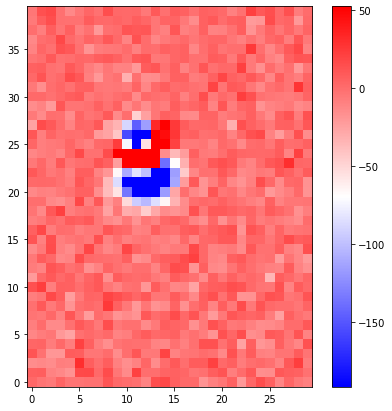

In [120]:
plt.figure(figsize=(7,7))
p = quantile_imshow(image_new[60:100,180:210] - images[1][60:100,180:210],cmap="bwr")
plt.colorbar(p)

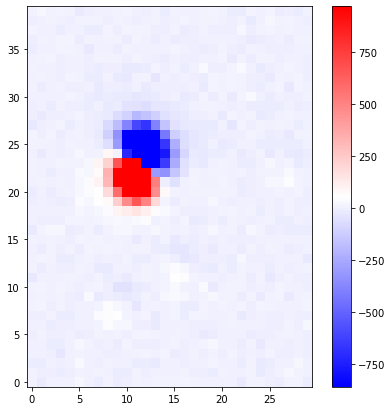

In [121]:
plt.figure(figsize=(7,7))
p = quantile_imshow(images[0][60:100,180:210] - images[1][60:100,180:210],cmap="bwr")
plt.colorbar(p)

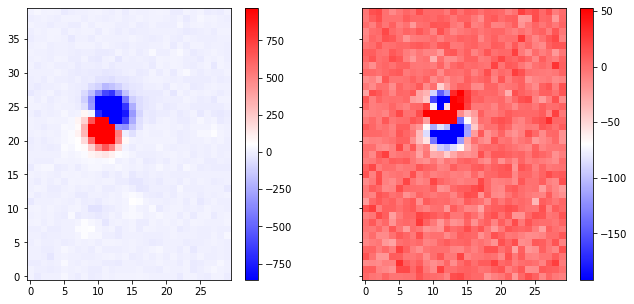

In [134]:
fig,ax = plt.subplots(ncols=2,figsize=(11,5),sharey=True)
plt.sca(ax[0])
p = quantile_imshow(images[0][60:100,180:210] - images[1][60:100,180:210],cmap="bwr")
plt.colorbar(p)
plt.sca(ax[1])
b = quantile_imshow(image_new[60:100,180:210] - images[1][60:100,180:210],cmap="bwr")
plt.colorbar(b)

### 2.6) Operaciones entre imágenes 

Más adelante se verán maneras más avanzadas de detectar movimiento, rotación, cambios de zoom y hasta perspectiva entre imágenes. Por ahora quisiéramos simplemente aproximar este movimiento como un vector de desplazamiento en pixeles.

Para eso restaremos ambas imágenes. Si las imágenes estuvieran bien alineadas, esta resta debería ser ruido.

Si no lo están, como en este caso, se ve algo como esto:

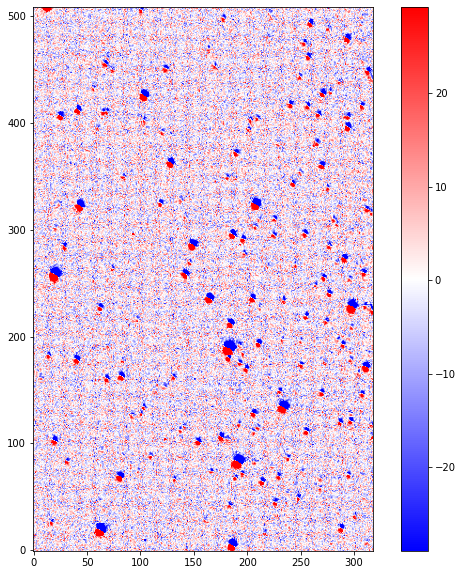

In [122]:
plt.figure(figsize=(10,10))
p = quantile_imshow(images[0] - images[1],cmap="bwr")
plt.colorbar(p)

Así podemos darnos cuenta que todas las estrellas están movidas un poco en x y un poco en y. Pero ahora podemos aplicar el vector de desplazamiento calculado anteriormente:

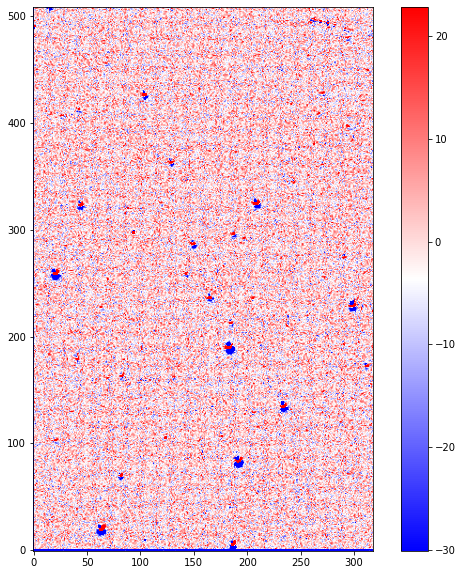

In [123]:
plt.figure(figsize=(10,10))
p = quantile_imshow(image_new - images[1],cmap="bwr")
plt.colorbar(p)

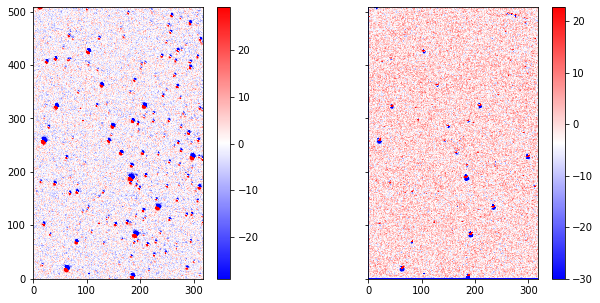

In [136]:
fig,ax = plt.subplots(ncols=2,figsize=(11,5),sharey=True)
plt.sca(ax[0])
p = quantile_imshow(images[0] - images[1],cmap="bwr")
plt.colorbar(p)
plt.sca(ax[1])
p = quantile_imshow(image_new - images[1],cmap="bwr")
plt.colorbar(p)
